<a href="https://colab.research.google.com/github/seunghwan1228/Titanic/blob/master/3)Titanic_ML_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## In this document, i choosed the LogisticRegression(Logit) model as bench mark 
## because Logit is most common model for classification in ML. 
## also this document contains  Dimensionality  reduction for data visualization - TSNE



---


However, other documents contains various models, with 

* KNN
* Naive Bayes
* Logistic Regression
* SVM - linear / kernel
* Decision Tree - with visualization
* Boosting - Adaboost / gradient boost
* Ensemble - Vote classifier with (Randomforest, KNN, Naive Bayes, Logit, SVM)
* RandomForest
* Neural network with Keras     -  *After  the Version _TensorFlow 2.0, Keras is TF's higher level API*

this is one of process to select the effective model

# 0)  Pre_steps

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
train = pd.read_csv('/content/drive/input/Titanic/working_dir/train_final.csv')
test = pd.read_csv('/content/drive/input/Titanic/working_dir/test_final.csv')

In [0]:
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,Survived
0,-0.502445,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.786845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,-0.488854,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.420730,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,-0.486337,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [0]:
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,-0.497311,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.512175,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.463999,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.482373,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.417392,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [0]:
label = train['Survived']
train = train.drop('Survived', axis = 1)

In [0]:
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,-0.502445,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.786845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.488854,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.420730,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.486337,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
label[:5]

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train, label, test_size=0.2, random_state=42)

In [0]:
print('--Train--')
print(X_train.shape, y_train.shape)
print('--Test--')
print(X_test.shape, y_test.shape)

--Train--
(712, 29) (712,)
--Test--
(179, 29) (179,)


# 1) Data Visualization - TSNE

before starting the ML, check how the data is distributed with TSNE

In [0]:
from sklearn.manifold import TSNE

In [0]:
tsne = TSNE(random_state=42)
tsne.fit(X_train)

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, perplexity=30.0,
     random_state=42, verbose=0)

In [0]:
tsne_array = tsne.fit_transform(X_train)

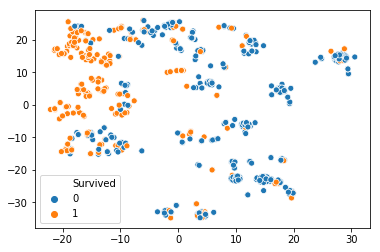

In [0]:
sns.scatterplot(tsne_array[:, 0], tsne_array[:, 1], hue = y_train)

# 1) Logistic Regression

In [0]:
logit_clf = LogisticRegression(random_state=42)

In [0]:
logit_clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
logit_clf.score(X_train, y_train)

0.8300561797752809

In [0]:
logit_clf.score(X_test, y_test)

0.7821229050279329

## Logit GridSearchCV

In [0]:
params = {'C' : np.logspace(0, 10, 50),
          'solver' :['liblinear', 'lbfgs']
         }

In [0]:
logit_grid = GridSearchCV(LogisticRegression(random_state=42), params, cv=5)

In [0]:
logit_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.00000000e...
       3.39322177e+06, 5.42867544e+06, 8.68511374e+06, 1.38949549e+07,
       2.22299648e+07, 3.55648031e+07, 5.68986603e+07, 9.10298178e+07,
       1.45634848e+08, 2.32995181e+08, 3.72759372e+08, 5.96362332e+08,
       9.54095476e+08, 1.52641797e+09, 2.44205309e+09, 3.90693994e+09,
       6.

In [0]:
logit_grid.best_params_

{'C': 6.551285568595509, 'solver': 'liblinear'}

In [0]:
logit_grid.best_score_

0.8314606741573034

In [0]:
logit_grid.best_estimator_.score(X_train, y_train)

0.8441011235955056

In [0]:
logit_grid.best_estimator_.score(X_test, y_test)

0.7988826815642458

## ROC - AUC analysis

In [0]:
logit_opt = logit_grid.best_estimator_

In [0]:
y_pred = logit_opt.predict(X_train)
roc_auc_score(y_train, y_pred)

0.8254504504504505

In [0]:
from yellowbrick.classifier import ROCAUC

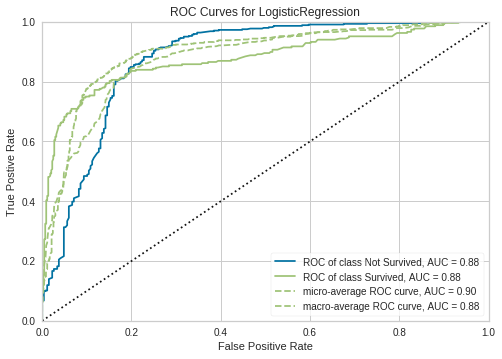

In [0]:
visualizer = ROCAUC(logit_opt, classes=['Not Survived','Survived'])

visualizer.fit(X_train, y_train)
visualizer.score(X_train,y_train)
visualizer.poof()

## ROC curve References

In [0]:
y_pred_prob = logit_opt.predict_proba(X_train)
y_pred_prob[:, 1]

In [0]:
fpr, tpr, thresholds = roc_curve(y_train, y_pred_prob[:, 1])

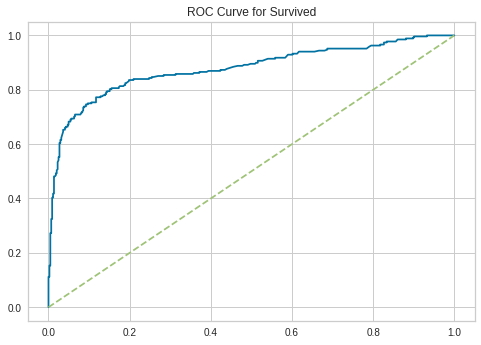

In [0]:
plt.title('ROC Curve for Survived')
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], '--')

## Conclusion

for the logit(Logistic Regression), its performance is 

Training : 0.8441011235955056 $\approx $ 84.41%

Test : 0.7988826815642458 $\approx$ 79.89% 

with gridSearch optimized with 

* {'C': 6.551285568595509, 'solver': 'liblinear'}
